In [ ]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)


In [ ]:
from tqdm import tqdm
import numpy as np

with open("svante.txt") as f:
    text = f.read()
words = text.split(" ")
min_chunk_size = 10
max_chunk_size = 150

start_deltas = 300
corr_functions = []
chunks = []

for start in tqdm(range(0, len(words), start_deltas)):
    words_at_start = words[start:start+max_chunk_size]
    chunk_10 = ' '.join(words_at_start[0:10])
    embedding_10 = client.embeddings.create(input = chunk_10, model = "text-embedding-3-large", dimensions=256)
    corr_function = []
    chunks.append([])
    for chunk_size in range(min_chunk_size, max_chunk_size, 5):
        # We don't need to compute embeddings on equal strings 
        if chunk_size > len(words_at_start):
            break
        chunk = ' '.join(words_at_start[:chunk_size])
        chunks[-1].append(chunk)
        
        embedding = client.embeddings.create(input = chunk, model = "text-embedding-3-large", dimensions=256, timeout=10)
        corr_function.append(np.dot(embedding_10.data[0].embedding, embedding.data[0].embedding))
    corr_functions.append(corr_function)


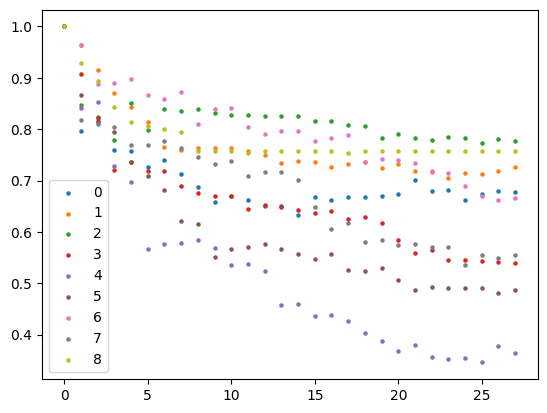

In [65]:
import matplotlib.pyplot as plt
for i, corr_function in enumerate(corr_functions):
    plt.scatter(range(len(corr_function)), corr_function, label = f'{i}', s=5)
    #plt.show()
plt.legend()

In [ ]:
counter = 0
found_it = None
relevant_chunks = [2,4]
for start in range(0, len(words), start_deltas):
    words_at_start = words[start:start+max_chunk_size]
    
    if counter in relevant_chunks:
        print("Found counter == ", counter)
        found_it = words_at_start
        for i in range(len(chunks[counter])):
            chunk = chunks[counter][i].replace('\n', ' ')
            print(f"     {i}{chunk}")
        
        #print(' '.join(words_at_start[0:max_chunk_size]))
        print('_' * 100 + '\n\n')
    counter += 1

In [62]:
first10 = client.embeddings.create(input = chunks[4][0], model = "text-embedding-3-large", dimensions=256)

contraceptive = client.embeddings.create(input = chunks[4][4], model = "text-embedding-3-large", dimensions=256)
atheist = client.embeddings.create(input = chunks[4][5], model = "text-embedding-3-large", dimensions=256)

sample1 = 'abortion'
sample2 = 'god'
embeddings = {
    sample1: client.embeddings.create(input = sample1, model = "text-embedding-3-large", dimensions=256),
    sample2: client.embeddings.create(input = sample2, model = "text-embedding-3-large", dimensions=256)

}

print(f'contraceptive+{sample1}',np.dot(contraceptive.data[0].embedding, embeddings[sample1].data[0].embedding))
print(f'contraceptive+{sample2}',np.dot(contraceptive.data[0].embedding, embeddings[sample2].data[0].embedding))
print(f'atheist+{sample1}',np.dot(atheist.data[0].embedding, embeddings[sample1].data[0].embedding))
print(f'atheist+{sample2}',np.dot(atheist.data[0].embedding, embeddings[sample2].data[0].embedding))



contraceptive+abortion 0.17927908155798855
contraceptive+god 0.060611198085039106
atheist+abortion 0.1477578540969085
atheist+god 0.15494354451057854


In [66]:
print(chunks[4][0])
print(np.dot(first10.data[0].embedding, contraceptive.data[0].embedding))
print(chunks[4][5])
print(np.dot(first10.data[0].embedding, atheist.data[0].embedding))


and contributed to the topic of contraceptives around 1910. However,
0.6964476672498912
and contributed to the topic of contraceptives around 1910. However, until 1938 information and sale of contraceptives was prohibited in the Kingdom of Sweden. Gordon Stein wrote that Svante Arrhenius was an atheist.[23][24] In his
0.5668537764586894


In [ ]:
corr_functions[8]